<p align="center">
    <picture>
    <source media="(prefers-color-scheme: dark)" srcset="https://docs.nerf.studio/en/latest/_images/logo-dark.png">
    <source media="(prefers-color-scheme: light)" srcset="https://docs.nerf.studio/en/latest/_images/logo.png">
    <img alt="nerfstudio" src="https://docs.nerf.studio/en/latest/_images/logo.png" width="400">
    </picture>
</p>


# Nerfstudio: Generating Volumetric Voxel Data from NeRFs

## Install Nerfstudio and Dependencies (~8 min)


In [1]:
%%capture
%cd /content/
!pip install --upgrade pip
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 --extra-index-url https://download.pytorch.org/whl/cu118

# Installing TinyCuda
%cd /content/
!gdown "https://drive.google.com/u/1/uc?id=1-7x7qQfB7bIw2zV4Lr6-yhvMpjXC84Q5&confirm=t"
!pip install tinycudann-1.7-cp310-cp310-linux_x86_64.whl

# Install SimpleITK to export voxel data
!pip install SimpleITK

# Installing COLMAP for camera pose estimation
%cd /content/
!gdown "https://drive.google.com/u/0/uc?id=15WngFRNar_b8CaPR5R-hvQ3eAnlyk_SL&confirm=t"
!sudo apt-get install \
    build-essential \
    libboost-program-options-dev \
    libboost-filesystem-dev \
    libboost-graph-dev \
    libboost-system-dev \
    libboost-test-dev \
    libeigen3-dev \
    libflann-dev \
    libfreeimage-dev \
    libmetis-dev \
    libgoogle-glog-dev \
    libgflags-dev \
    libsqlite3-dev \
    libglew-dev \
    qtbase5-dev \
    libqt5opengl5-dev \
    libcgal-dev \
    libceres-dev
!unzip local.zip -d /usr/
!chmod +x /usr/local/bin/colmap

# Install nerfstudio
%cd /content/
!pip install git+https://github.com/nerfstudio-project/nerfstudio.git

In [2]:
!pip list | grep -q 'nerfstudio' && echo 'Installation success!'

ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe
Installation success!


## Downloading and Processing Data

In [3]:
import os
import glob
from google.colab import files
from IPython.core.display import display, HTML

scene = '\uD83D\uDE9C dozer' #@param ['🖼 poster', '🚜 dozer', '🌄 desolation', '📤 upload your images' , '🎥 upload your own video', '🔺 upload Polycam data', '💽 upload your own Record3D data']
scene = ' '.join(scene.split(' ')[1:])

if scene == "upload Polycam data":
    %cd /content/
    !mkdir -p /content/data/nerfstudio/custom_data
    %cd /content/data/nerfstudio/custom_data/
    uploaded = files.upload()
    dir = os.getcwd()
    if len(uploaded.keys()) > 1:
        print("ERROR, upload a single .zip file when processing Polycam data")
    dataset_dir = [os.path.join(dir, f) for f in uploaded.keys()][0]
    !ns-process-data polycam --data $dataset_dir --output-dir /content/data/nerfstudio/custom_data/
    scene = "custom_data"
elif scene == 'upload your own Record3D data':
    display(HTML('<h3>Zip your Record3D folder, and upload.</h3>'))
    display(HTML('<h3>More information on Record3D can be found <a href="https://docs.nerf.studio/en/latest/quickstart/custom_dataset.html#record3d-capture" target="_blank">here</a>.</h3>'))
    %cd /content/
    !mkdir -p /content/data/nerfstudio/custom_data
    %cd /content/data/nerfstudio/custom_data/
    uploaded = files.upload()
    dir = os.getcwd()
    preupload_datasets = [os.path.join(dir, f) for f in uploaded.keys()]
    record_3d_zipfile = preupload_datasets[0]
    !unzip $record_3d_zipfile -d /content/data/nerfstudio/custom_data
    custom_data_directory = glob.glob('/content/data/nerfstudio/custom_data/*')[0]
    !ns-process-data record3d --data $custom_data_directory --output-dir /content/data/nerfstudio/custom_data/
    scene = "custom_data"
elif scene in ['upload your images', 'upload your own video']:
    display(HTML('<h3>Select your custom data</h3>'))
    display(HTML('<p/>You can select multiple images by pressing ctrl, cmd or shift and click.<p>'))
    display(HTML('<p/>Note: This may take time, especially on higher resolution inputs, so we recommend to download dataset after creation.<p>'))
    !mkdir -p /content/data/nerfstudio/custom_data
    if scene == 'upload your images':
        !mkdir -p /content/data/nerfstudio/custom_data/raw_images
        %cd /content/data/nerfstudio/custom_data/raw_images
        uploaded = files.upload()
        dir = os.getcwd()
    else:
        %cd /content/data/nerfstudio/custom_data/
        uploaded = files.upload()
        dir = os.getcwd()
    preupload_datasets = [os.path.join(dir, f) for f in uploaded.keys()]
    del uploaded
    %cd /content/

    if scene == 'upload your images':
        !ns-process-data images --data /content/data/nerfstudio/custom_data/raw_images --output-dir /content/data/nerfstudio/custom_data/
    else:
        video_path = preupload_datasets[0]
        !ns-process-data video --data $video_path --output-dir /content/data/nerfstudio/custom_data/

    scene = "custom_data"
else:
    %cd /content/
    !ns-download-data nerfstudio --capture-name=$scene

print("Data Processing Succeeded!")

/content
2023-07-16 14:44:31.038412: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
--2023-07-16 14:44:33--  https://data.nerf.studio/nerfstudio/dozer.zip
Resolving data.nerf.studio (data.nerf.studio)... 34.102.68.79
Connecting to data.nerf.studio (data.nerf.studio)|34.102.68.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1347483375 (1.3G) [application/zip]
Saving to: ‘data/nerfstudio/dozer.zip’

data/nerfstudio/doz 100%[===================>]   1.25G  60.6MB/s    in 39s     

2023-07-16 14:45:13 (32.8 MB/s) - ‘data/nerfstudio/dozer.zip’ saved [1347483375/1347483375]

Data Processing Succeeded!


## Set up and Start Viewer


In [4]:
%cd /content

!npm install -g localtunnel

# Tunnel port 7007 by default
!rm url.txt 2> /dev/null
get_ipython().system_raw('lt --port 7007 >> url.txt 2>&1 &')

import time
time.sleep(3) # the previous command needs time to write to url.txt

with open('url.txt') as f:
    lines = f.readlines()
websocket_url = lines[0].split(": ")[1].strip().replace("https", "wss")

url = f"https://viewer.nerf.studio/?websocket_url={websocket_url}"
print(url)
print("You may need to click Refresh Page after you start training!")
from IPython import display
display.IFrame(src=url, height=800, width="100%")

/content
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.081s
https://viewer.nerf.studio/?websocket_url=wss://wide-eagles-show.loca.lt
You may need to click Refresh Page after you start training!


## Start Training

In [5]:
%%capture
%cd /content
!ns-train nerfacto --viewer.websocket-port 7007 nerfstudio-data --data data/nerfstudio/$scene --downscale-factor 4

# Surface Reconstruction

In [ ]:
# Reconstruct mesh
!ns-export poisson --load-config CONFIG.yml --output-dir /content/

In [ ]:
# Reconstruct texture
!python nerfstudio/scripts/texture.py --load-config CONFIG.yml --input-mesh-filename FILENAME --output-dir OUTPUT_DIR


# Volume Baking from NeRF Checkpoint

## Import Checkpoint from `state_dict`

**Important**: To import model you must first restart the runtime via `Runtime > Restart Runtime`.

In [1]:
# Define function to correctly import Nerfacto Model state dicts
import torch
from collections import OrderedDict

def load_state_dict(path):
    pipeline_state_dict = torch.load(path, map_location='cpu')['pipeline']

    aabb = pipeline_state_dict['_model.field.aabb']
    num_images = pipeline_state_dict['datamanager.train_camera_optimizer.pose_adjustment'].size(0)

    model_state_dict = OrderedDict()
    for key, value in pipeline_state_dict.items():
        if key.startswith('_model.'):
            model_state_dict[key[len('_model.'):]] = value

    return {'model': model_state_dict}, aabb, num_images

In [2]:
# Load model from checkpoint
from nerfstudio.data.scene_box import SceneBox
from nerfstudio.models.nerfacto import NerfactoModel, NerfactoModelConfig

CHECKPOINT_FILE = "/content/outputs/unnamed/nerfacto/2023-07-16_144646/nerfstudio_models/step-000004000.ckpt"

state_dict, aabb, num_images = load_state_dict(CHECKPOINT_FILE)

config = NerfactoModelConfig()
scene_box = SceneBox(aabb)
model = NerfactoModel(config=config, scene_box=scene_box, num_train_data=num_images)
model.load_model(state_dict)
model.to('cuda')
print(f'Loaded NerfactoModel from checkpoint {CHECKPOINT_FILE}')

Loaded NerfactoModel from checkpoint /content/outputs/unnamed/nerfacto/2023-07-16_144646/nerfstudio_models/step-000004000.ckpt


## Volume Baking

In [3]:
import numpy as np

# Define bounding box
aabb_scaled = np.array([
    [-2, -2, -2.],
    [0., 0., 0.]
])
aabb_scaled = .6 * (aabb_scaled - np.mean(aabb_scaled, axis=0, keepdims=True)) + np.mean(aabb_scaled, axis=0, keepdims=True)

In [4]:
import torch
import numpy as np
from tqdm import tqdm
from nerfstudio.cameras.rays import RayBundle


def sample_rays(model, nx, ny, nz, aabb, batch_size=64):
    pixel_area = torch.FloatTensor([[1.]])
    camera_indices = torch.LongTensor([[1]])
    bin_starts = torch.FloatTensor([[0.]])
    bin_ends = torch.FloatTensor([[2.]])
    directions = torch.FloatTensor([[1., 1., 1.]] * batch_size) # move into x-direction with ray

    colors = np.zeros((nx * ny * nz, 3), dtype=np.float16)
    densities = np.zeros((nx * ny * nz, 1), dtype=np.float16)

    x = np.linspace(aabb[0, 0], aabb[1, 0], nx)
    y = np.linspace(aabb[0, 1], aabb[1, 1], ny)
    z = np.linspace(aabb[0, 2], aabb[1, 2], nz)

    u = np.arange(nx)
    v = np.arange(ny)
    w = np.arange(nz)

    xyz = np.array(np.meshgrid(x, y, z)).T.reshape(-1, 3)
    uvw = np.array(np.meshgrid(u, v, w)).T.reshape(-1, 3)

    # create array of rays with origins in xy plane
    with torch.no_grad():
        with tqdm(total=nx * ny * nz) as pbar:
            for i in range(0, xyz.shape[0], batch_size):

                origins = torch.FloatTensor(xyz[i:i + batch_size])

                # Format a ray from origin into specified direction
                ray_bundle = RayBundle(
                    origins=origins,
                    directions=directions,
                    pixel_area=pixel_area,
                    camera_indices=camera_indices
                )

                ray_samples = ray_bundle.get_ray_samples(
                    bin_starts=bin_starts,
                    bin_ends=bin_ends,
                ).to('cuda')

                # Query Nerfacto model for sample densities/RGB colors
                model_out = model.field.forward(ray_samples)
                rgb, density = None, None
                for key, value in model_out.items():
                    if 'RGB' in str(key):
                        colors[i: i + batch_size] = value[:, 0].cpu().detach().numpy()
                    elif 'DENSITY' in str(key):
                        densities[i: i + batch_size] = value[:, 0].cpu().detach().numpy()

                pbar.update(batch_size)

    return colors.reshape(nx, ny, nz, -1), densities.reshape(nx, ny, nz, -1)

In [5]:
colors, densities = sample_rays(model, 128, 128, 128, aabb_scaled)
np.save("colors.npy", colors)
np.save("densities.npy", densities)

100%|██████████| 2097152/2097152 [01:46<00:00, 19637.36it/s]


### Save volume data as DICOM file

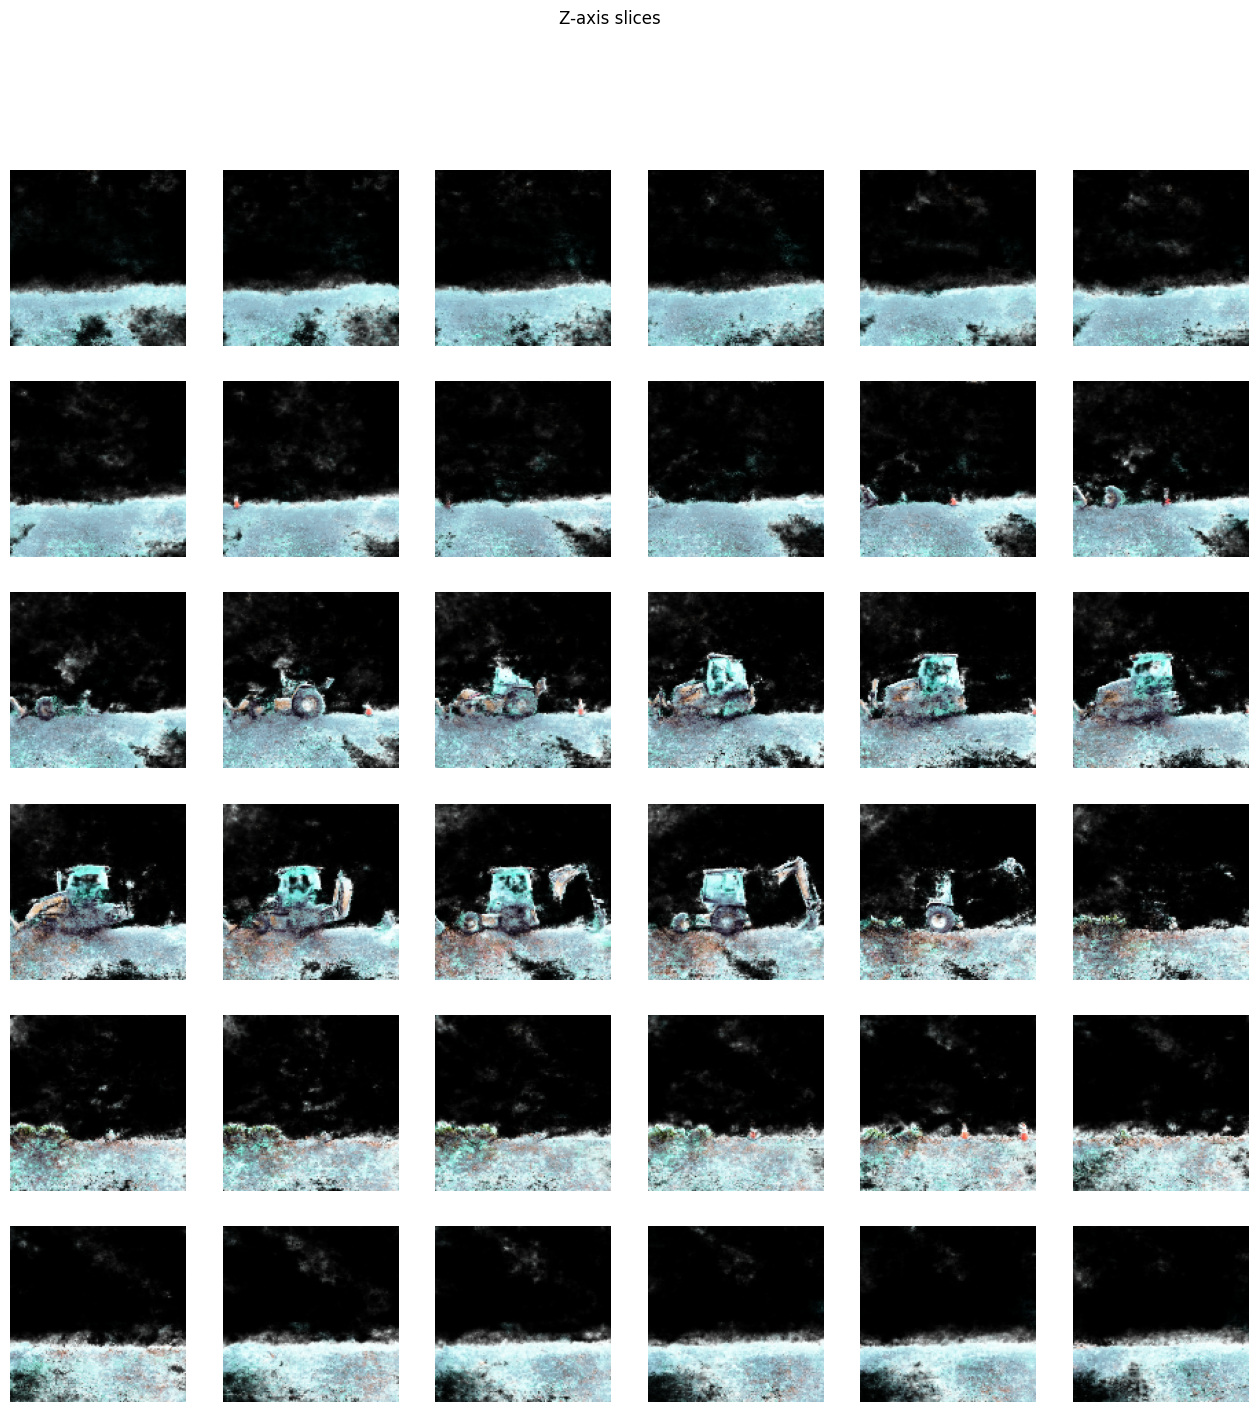

In [6]:
import matplotlib.pyplot as plt

nrows = 6
ncols = 6

plt.figure(figsize=(16, 16))
for i in range(nrows * ncols):

    j = int(i * densities.shape[2] / (nrows * ncols))
    z_slice_color = colors[:, :, j]
    z_slice_dense = densities[:, :, j]

    z_slice = np.clip(z_slice_color, 0, 1) * (1 - np.exp(-z_slice_dense))

    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(z_slice[::-1].astype(np.float32), cmap='gray')
    plt.axis('off')

plt.suptitle('Z-axis slices')
plt.show()

In [12]:
def save_volume(filename, colors, densities, aabb, density_threshold=0.0):
    # Source: https://github.com/kwea123/nerf_pl/blob/master/extract_mesh.ipynb
    bbox_size = np.mean(aabb[1] - aabb[0])
    resolution = int(np.mean(densities.shape[:3]))

    a = 1 - np.exp(-bbox_size / resolution * densities[:, :, :, 0])
    a = a.flatten()
    i = np.where(a > density_threshold)[0] # valid indices (alpha>0)

    rgb = (colors.reshape(-1, 3) * 255).astype(np.uint32)

    rgb = rgb[i]
    a = a[i]
    s = rgb.dot(np.array([1<<24, 1<<16, 1<<8])) + (a * 255).astype(np.uint32)
    res = np.stack([i, s], -1).astype(np.uint32).flatten()
    with open(filename, 'wb') as f:
        f.write(res.tobytes())

In [13]:
save_volume(
    filename="/content/outputs/unnamed/nerfacto/2023-07-16_144646/truck.vol",
    colors=colors,
    densities=densities,
    aabb=aabb_scaled,
    density_threshold=.01
)